In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train.shape

(59922, 57)

In [5]:
df_test.shape

(39949, 56)

In [6]:
df_train.head()

,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,party_players,...,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak,skilled
0,radiant,radiant,2050,90,64,0,27,7,0,1,...,14,310,433,10,25,427,760,5,8,1
1,dire,radiant,3587,90,54,0,87,6,0,1,...,18,300,375,10,32,411,544,0,4,1
2,radiant,dire,2642,90,7,0,74,6,0,1,...,10,519,598,25,18,730,876,0,5,0
3,radiant,dire,2583,90,138,0,54,6,0,1,...,10,514,567,24,28,823,872,0,7,1
4,radiant,dire,1953,90,169,0,23,8,0,1,...,16,341,416,14,43,627,753,0,5,1


In [7]:
df_test.head()

,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,party_players,...,avg_deaths_x16,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak
0,radiant,dire,2044,90,46,0,44,7,0,1,...,7,12,471,566,26,29,654,827,0,3
1,radiant,radiant,3437,90,235,0,21,4,0,2,...,7,14,511,627,26,28,686,872,5,8
2,radiant,dire,2539,60,74,0,20,2,0,2,...,7,9,443,482,21,19,958,794,1,4
3,dire,radiant,2115,90,115,0,129,1,0,1,...,8,14,501,695,6,14,501,695,0,0
4,dire,radiant,827,60,65,0,85,9,0,2,...,4,20,341,408,9,37,459,542,2,2


In [8]:
y = df_train['skilled']

In [9]:
df_train_points = df_train.drop(columns='skilled')

In [10]:
y.value_counts(normalize=True)

0    0.602533
1    0.397467
Name: skilled, dtype: float64

In [11]:
df_train_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59922 entries, 0 to 59921
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_team               59922 non-null  object 
 1   winner_team               59922 non-null  object 
 2   duration                  59922 non-null  int64  
 3   pre_game_duration         59922 non-null  int64  
 4   first_blood_time          59922 non-null  int64  
 5   first_blood_claimed       59922 non-null  int64  
 6   hero_id                   59922 non-null  int64  
 7   hero_pick_order           59922 non-null  int64  
 8   leaver_status             59922 non-null  int64  
 9   party_players             59922 non-null  int64  
 10  kills                     59922 non-null  int64  
 11  deaths                    59922 non-null  int64  
 12  assists                   59922 non-null  int64  
 13  denies                    59922 non-null  int64  
 14  level 

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39949 entries, 0 to 39948
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_team               39949 non-null  object 
 1   winner_team               39949 non-null  object 
 2   duration                  39949 non-null  int64  
 3   pre_game_duration         39949 non-null  int64  
 4   first_blood_time          39949 non-null  int64  
 5   first_blood_claimed       39949 non-null  int64  
 6   hero_id                   39949 non-null  int64  
 7   hero_pick_order           39949 non-null  int64  
 8   leaver_status             39949 non-null  int64  
 9   party_players             39949 non-null  int64  
 10  kills                     39949 non-null  int64  
 11  deaths                    39949 non-null  int64  
 12  assists                   39949 non-null  int64  
 13  denies                    39949 non-null  int64  
 14  level 

In [13]:
df_train_points['push_score'].dtype

dtype('float64')

In [14]:
cat_features = [i for i in df_train_points.columns if df_train_points[i].dtype == 'object']

In [15]:
cat_features

['player_team', 'winner_team']

In [16]:
num_features = [i for i in df_train_points.columns if i not in cat_features]

In [17]:
num_features

['duration',
 'pre_game_duration',
 'first_blood_time',
 'first_blood_claimed',
 'hero_id',
 'hero_pick_order',
 'leaver_status',
 'party_players',
 'kills',
 'deaths',
 'assists',
 'denies',
 'level',
 'net_worth',
 'gold',
 'gold_spent',
 'last_hits',
 'gold_per_min',
 'xp_per_min',
 'hero_damage',
 'tower_damage',
 'hero_healing',
 'scaled_hero_damage',
 'scaled_tower_damage',
 'scaled_hero_healing',
 'stuns',
 'team_fight_participation',
 'observer_wards_placed',
 'sentry_wards_placed',
 'creeps_stacked',
 'camps_stacked',
 'rune_pickups',
 'tower_kills',
 'roshan_kills',
 'nearby_creep_death_count',
 'radiant_tower_status',
 'dire_tower_status',
 'radiant_barracks_status',
 'dire_barracks_status',
 'fight_score',
 'farm_score',
 'support_score',
 'push_score',
 'avg_kills_x16',
 'avg_deaths_x16',
 'avg_assists_x16',
 'avg_gpm_x16',
 'avg_xpm_x16',
 'best_kills_x16',
 'best_assists_x16',
 'best_gpm_x16',
 'best_xpm_x16',
 'win_streak',
 'best_win_streak']

In [18]:
df_train_points.player_team.value_counts()

radiant    30183
dire       29739
Name: player_team, dtype: int64

In [19]:
df_train_points.winner_team.value_counts()

radiant    32738
dire       27184
Name: winner_team, dtype: int64

In [20]:
cont_features = []
disc_features = []

for feature in num_features:
    if len(df_train_points[feature].unique()) > 1500:
        cont_features.append(feature)
    else:
        disc_features.append(feature)

In [21]:
cont_features

['duration',
 'net_worth',
 'gold',
 'gold_spent',
 'gold_per_min',
 'xp_per_min',
 'hero_damage',
 'tower_damage',
 'hero_healing',
 'scaled_hero_damage',
 'scaled_tower_damage',
 'scaled_hero_healing',
 'stuns',
 'farm_score',
 'support_score',
 'push_score']

In [22]:
disc_features

['pre_game_duration',
 'first_blood_time',
 'first_blood_claimed',
 'hero_id',
 'hero_pick_order',
 'leaver_status',
 'party_players',
 'kills',
 'deaths',
 'assists',
 'denies',
 'level',
 'last_hits',
 'team_fight_participation',
 'observer_wards_placed',
 'sentry_wards_placed',
 'creeps_stacked',
 'camps_stacked',
 'rune_pickups',
 'tower_kills',
 'roshan_kills',
 'nearby_creep_death_count',
 'radiant_tower_status',
 'dire_tower_status',
 'radiant_barracks_status',
 'dire_barracks_status',
 'fight_score',
 'avg_kills_x16',
 'avg_deaths_x16',
 'avg_assists_x16',
 'avg_gpm_x16',
 'avg_xpm_x16',
 'best_kills_x16',
 'best_assists_x16',
 'best_gpm_x16',
 'best_xpm_x16',
 'win_streak',
 'best_win_streak']

Значение полей таблиц с данными

Целевая переменная:
- `skilled`: 1 — опытный игрок, 0 — новичок; эту колонку необходимо предсказывать для тестовой выборки

Информация про матч:
- `player_team`: команда, за которую играл игрок (`radiant` или `dire`)
- `winner_team`: победившая команда
- `hero_id`: идентификатор героя, за которого играл целевой игрок (расшифровку см. в таблице `heroes.csv`)
- `duration`: длительность игры в секундах
- `first_blood_time`: время события "первая кровь"
- `first_blood_claimed`: сделал ли целевой игрок "первую кровь"
- `party_players`: сколько игроков было в "пати" вместе с целевым

Показатели целевого игрока в матче:
- `kills`, `deaths`, `assists`, `denies`, `last_hits` — основные игровые показатели (число убийств вражеских героев, число смертей, и др.)
- `stuns`: нанесенные "оглушения" (в секундах)
- `level`: уровень, которого достиг герой к концу игры
- `net_worth`: общая стоимость всего инвентаря героя
- `gold`: число золота на момент игры
- `gold_spent`: сумма потраченного золота за всю игру
- `gold_per_min`: скорость зарабатывания золота
- `xp_per_min`: скорость получения опыта
- `hero_damage`: суммарный урон по вражеским героям
- `tower_damage`: сумарный урон по вражеским башням
- `hero_healing`: суммарное восстановленное здоровье союзных героев 
- `team_fight_participation`: участие в драках
- `observer_wards_placed`, `sentry_wards_placed`: количество установленных на карту "вардов" (предметы, дающие обзор)
- `rune_pickups`: количество собранных рун
- `radiant_tower_status`, `dire_tower_status`: состояние башен команд на конец игры (см. [расшифровку](https://wiki.teamfortress.com/wiki/WebAPI/GetMatchDetails#Tower_Status))
- `radiant_barracks_status`, `dire_barracks_status`: состояние бараков команд на конец игры (см. [расшифровку](https://wiki.teamfortress.com/wiki/WebAPI/GetMatchDetails#Barracks_Status))

Показатели по последним матчам игрока:
- `avg_kills_x16`, `avg_deaths_x16`, `avg_assists_x16`, `avg_gpm_x16`, `avg_xpm_x16`: средние значения показателей за последние 16 игр
- `best_kills_x16`, `best_assists_x16`, `best_gpm_x16`, `best_xpm_x16`: максимальные значения показателей за последние 16 игр
- `win_streak`, `best_win_streak`: число подряд выигранных матчей до текущего, максимальное число подряд выигранных матчей

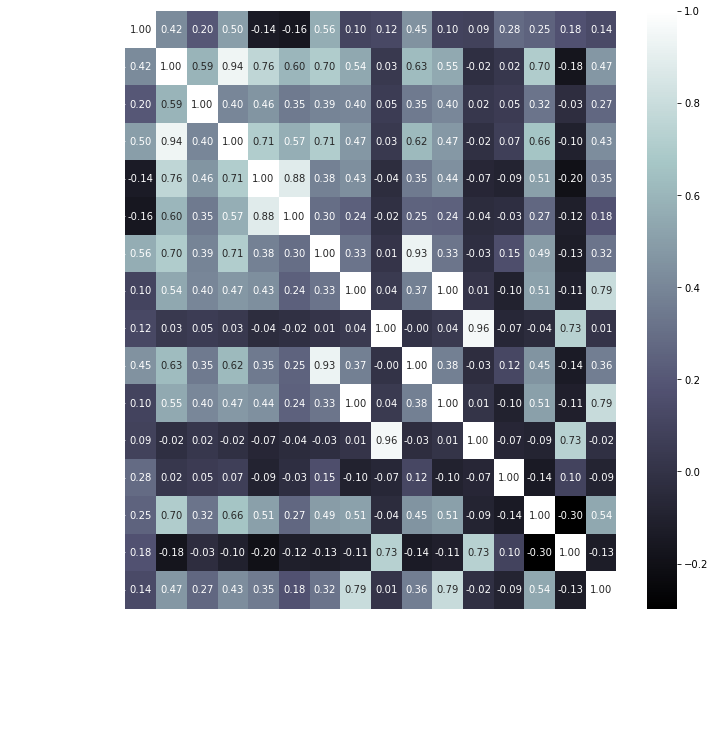

In [23]:
fig, ax = plt.subplots(figsize=(11, 11))

sns.heatmap(ax=ax, 
            data=df_train[cont_features].corr(), 
            annot = True, 
            cmap='bone', 
            fmt=".2f"
           )
plt.tick_params(colors = 'white')
plt.show();

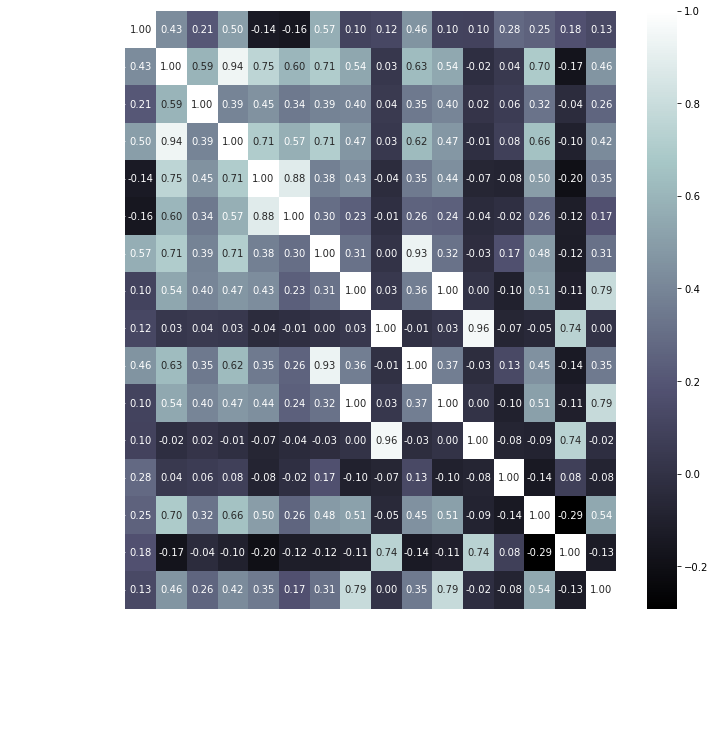

In [24]:
fig, ax = plt.subplots(figsize=(11, 11))

sns.heatmap(ax=ax, 
            data=df_test[cont_features].corr(), 
            annot = True, 
            cmap='bone', 
            fmt=".2f"
           )
plt.tick_params(colors = 'white')
plt.show();

Сильно коррелируют
* net_worth и gold_spent
* net_worth и hero_damage
* hero_damage и gold_spent
* hero_damage и scaled_hero_damage
* farm_score и net_worth
* support_score и hero_healing
* push_score и tower_damage
* push_score scaled_tower_damage
* gold_per_min и gold_spent
* gold_per_min и xp_per_min

* *net_worth: общая стоимость всего инвентаря героя*
* *gold_spent: сумма потраченного золота за всю игру*
* *hero_damage: суммарный урон по вражеским героям*
* *hero_healing: суммарное восстановленное здоровье союзных героев*

Предположим, необходимо убрать gold_spent, hero_damage, farm_score, support_score, tower_damage, scaled_tower_damage, scaled_hero_damage, xp_per_min

In [25]:
num_features_new = [i for i in num_features if i not in ('xp_per_min','gold_spent', 'hero_damage', 'farm_score', 'support_score', 'tower_damage', 'scaled_tower_damage', 'scaled_hero_damage')]

In [26]:
cont_features_new = [i for i in cont_features if i not in ('xp_per_min','gold_spent', 'hero_damage', 'farm_score', 'support_score', 'tower_damage', 'scaled_tower_damage', 'scaled_hero_damage')]

In [27]:
disc_features

['pre_game_duration',
 'first_blood_time',
 'first_blood_claimed',
 'hero_id',
 'hero_pick_order',
 'leaver_status',
 'party_players',
 'kills',
 'deaths',
 'assists',
 'denies',
 'level',
 'last_hits',
 'team_fight_participation',
 'observer_wards_placed',
 'sentry_wards_placed',
 'creeps_stacked',
 'camps_stacked',
 'rune_pickups',
 'tower_kills',
 'roshan_kills',
 'nearby_creep_death_count',
 'radiant_tower_status',
 'dire_tower_status',
 'radiant_barracks_status',
 'dire_barracks_status',
 'fight_score',
 'avg_kills_x16',
 'avg_deaths_x16',
 'avg_assists_x16',
 'avg_gpm_x16',
 'avg_xpm_x16',
 'best_kills_x16',
 'best_assists_x16',
 'best_gpm_x16',
 'best_xpm_x16',
 'win_streak',
 'best_win_streak']

In [28]:
cat_features

['player_team', 'winner_team']

In [29]:
drop_features = [i for i in df_train_points.columns if i not in num_features_new and i not in cat_features]

In [30]:
drop_features

['gold_spent',
 'xp_per_min',
 'hero_damage',
 'tower_damage',
 'scaled_hero_damage',
 'scaled_tower_damage',
 'farm_score',
 'support_score']

In [31]:
df_train_points.drop(columns = drop_features, axis = 1, inplace = True)

In [32]:
df_test.drop(columns = drop_features, axis = 1, inplace = True)

    Посмотрим на распределение числовых признаков

In [3]:
for i in disc_features:
    plt.rcParams['figure.figsize'] = (5,5)
    df_train_points[i].hist(
    color="blue",
    grid=False,
    legend=False,
    yrot=30,
    bins=15);
    plt.tick_params(colors='white')
    plt.title(label = i,color='white')
    plt.show();

NameError: name 'disc_features' is not defined

    Стандартизируем дискретные переменные

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_points[disc_features]= scaler.fit_transform(df_train_points[disc_features])

In [35]:
df_test[disc_features]= scaler.transform(df_test[disc_features])

    Применим дисперсионный анализ к категориальным признакам Anova

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

d = dict()

for x in cat_features:
    model = ols('skilled' + '~' + x, data = df_train).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model, typ=1) # ANOVA Test
    d[result_anova.index[0]] = result_anova.iloc[0, -1]
res_anova = pd.DataFrame(d.values(), columns = ['PR[>F]'], index = d.keys())

In [37]:
res_anova

,PR[>F]
player_team,0.916730
winner_team,0.039594


In [38]:
res_anova[res_anova['PR[>F]']>=0.05]

,PR[>F]
player_team,0.91673


In [39]:
df_train_points.drop(columns = ['player_team'], axis = 1, inplace = True)
df_test.drop(columns = ['player_team'], axis = 1, inplace = True)

cat_features_new = ['winner_team']

In [40]:
df_train_points.winner_team.value_counts()

radiant    32738
dire       27184
Name: winner_team, dtype: int64

    OneHotEncoding категориальные переменные


In [41]:
df_train_points.shape

(59922, 47)

In [42]:
df_train_dummies = pd.get_dummies(df_train_points, columns=cat_features_new, dummy_na=True, drop_first=True)

In [43]:
df_train_dummies.shape

(59922, 48)

In [44]:
df_test_dummies = pd.get_dummies(df_test, columns=cat_features_new, dummy_na=True, drop_first=True)

In [45]:
df_test_dummies.shape

(39949, 48)

    Итог

    Машинное обучение

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_dummies, y, test_size=0.3)

1. Дерево решений

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [48]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

In [49]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ["gini"],
    'splitter':["best", "random"],
    'max_depth': [5, 10, 15, 25, 20],
    'min_samples_split': [5, 4, 6, 8, 3],
    'max_features': ['auto', 'log2', None, 'sqrt']
}

CV_clf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kfold,
    verbose=1000,
    n_jobs=-1,
)

In [50]:
CV_clf.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 5/5; 1/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best
[CV 5/5; 1/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best;, score=0.663 total time=   0.2s
[CV 1/5; 4/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=random
[CV 1/5; 4/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=random;, score=0.578 total time=   0.1s
[CV 5/5; 4/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=random
[CV 5/5; 4/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=random;, score=0.611 total time=   0.1s
[CV 1/5; 6/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, splitter=random
[CV 1/5; 6/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, splitter=

[CV 2/5; 1/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best
[CV 2/5; 1/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best;, score=0.649 total time=   0.1s
[CV 2/5; 3/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=best
[CV 2/5; 3/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=best;, score=0.645 total time=   0.1s
[CV 3/5; 4/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=random
[CV 3/5; 4/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=random;, score=0.594 total time=   0.1s
[CV 3/5; 5/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, splitter=best
[CV 3/5; 5/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, splitter=best;, score=0.638 total time=   0.1s
[CV 2/5; 7/200] START criterion=

[CV 2/5; 2/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=random
[CV 2/5; 2/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=random;, score=0.584 total time=   0.1s
[CV 5/5; 3/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=best
[CV 5/5; 3/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=4, splitter=best;, score=0.652 total time=   0.1s
[CV 4/5; 5/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, splitter=best
[CV 4/5; 5/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=6, splitter=best;, score=0.658 total time=   0.2s
[CV 3/5; 7/200] START criterion=gini, max_depth=5, max_features=auto, min_samples_split=8, splitter=best
[CV 3/5; 7/200] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=8, splitter=best;, score=0.662 total time=   0.2s
[CV 3/5; 9/200] START criterion=

[CV 4/5; 43/200] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=4, splitter=best
[CV 4/5; 43/200] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=4, splitter=best;, score=0.671 total time=   0.2s
[CV 2/5; 45/200] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, splitter=best
[CV 2/5; 45/200] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=6, splitter=best;, score=0.655 total time=   0.2s
[CV 3/5; 47/200] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, splitter=best
[CV 3/5; 47/200] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, splitter=best;, score=0.663 total time=   0.2s
[CV 4/5; 49/200] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, splitter=best
[CV 4/5; 49/200] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, splitter=best;, score=0.655 total time=   0.2s
[CV 4/5; 51/200] STA

[CV 1/5; 50/200] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, splitter=random;, score=0.608 total time=   0.1s
[CV 4/5; 50/200] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, splitter=random
[CV 4/5; 50/200] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, splitter=random;, score=0.619 total time=   0.1s
[CV 2/5; 52/200] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, splitter=random
[CV 2/5; 52/200] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, splitter=random;, score=0.586 total time=   0.1s
[CV 5/5; 52/200] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, splitter=random
[CV 5/5; 52/200] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, splitter=random;, score=0.592 total time=   0.1s
[CV 3/5; 54/200] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=4, splitter=random
[CV 

[CV 2/5; 58/200] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, splitter=random;, score=0.605 total time=   0.2s
[CV 5/5; 59/200] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, splitter=best
[CV 5/5; 59/200] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, splitter=best;, score=0.678 total time=   0.2s
[CV 4/5; 61/200] START criterion=gini, max_depth=10, max_features=None, min_samples_split=5, splitter=best
[CV 4/5; 61/200] END criterion=gini, max_depth=10, max_features=None, min_samples_split=5, splitter=best;, score=0.680 total time=   0.9s
[CV 5/5; 63/200] START criterion=gini, max_depth=10, max_features=None, min_samples_split=4, splitter=best
[CV 5/5; 63/200] END criterion=gini, max_depth=10, max_features=None, min_samples_split=4, splitter=best;, score=0.684 total time=   0.9s
[CV 2/5; 66/200] START criterion=gini, max_depth=10, max_features=None, min_samples_split=6, splitter=random
[CV 2/5; 66/200]

[CV 5/5; 56/200] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=6, splitter=random
[CV 5/5; 56/200] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=6, splitter=random;, score=0.629 total time=   0.1s
[CV 1/5; 58/200] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, splitter=random
[CV 1/5; 58/200] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, splitter=random;, score=0.616 total time=   0.1s
[CV 3/5; 59/200] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, splitter=best
[CV 3/5; 59/200] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, splitter=best;, score=0.653 total time=   0.2s
[CV 3/5; 61/200] START criterion=gini, max_depth=10, max_features=None, min_samples_split=5, splitter=best
[CV 3/5; 61/200] END criterion=gini, max_depth=10, max_features=None, min_samples_split=5, splitter=best;, score=0.674 total time=   0.9s
[CV 4/5; 63/

[CV 1/5; 99/200] START criterion=gini, max_depth=15, max_features=log2, min_samples_split=3, splitter=best
[CV 1/5; 99/200] END criterion=gini, max_depth=15, max_features=log2, min_samples_split=3, splitter=best;, score=0.623 total time=   0.2s
[CV 5/5; 100/200] START criterion=gini, max_depth=15, max_features=log2, min_samples_split=3, splitter=random
[CV 5/5; 100/200] END criterion=gini, max_depth=15, max_features=log2, min_samples_split=3, splitter=random;, score=0.631 total time=   0.2s
[CV 2/5; 102/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=5, splitter=random
[CV 2/5; 102/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=5, splitter=random;, score=0.632 total time=   0.4s
[CV 4/5; 102/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=5, splitter=random
[CV 4/5; 102/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=5, splitter=random;, score=0.632 total time=   0.4s
[C

[CV 1/5; 105/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=6, splitter=best;, score=0.627 total time=   1.4s
[CV 5/5; 107/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=8, splitter=best
[CV 5/5; 107/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=8, splitter=best;, score=0.623 total time=   1.4s
[CV 3/5; 110/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=3, splitter=random
[CV 3/5; 110/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=3, splitter=random;, score=0.641 total time=   0.4s
[CV 1/5; 111/200] START criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best
[CV 1/5; 111/200] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.626 total time=   0.2s
[CV 5/5; 111/200] START criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=5, splitter=best
[CV 5/5;

[CV 4/5; 103/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=4, splitter=best
[CV 4/5; 103/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=4, splitter=best;, score=0.612 total time=   1.3s
[CV 3/5; 106/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=6, splitter=random
[CV 3/5; 106/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=6, splitter=random;, score=0.630 total time=   0.4s
[CV 1/5; 107/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=8, splitter=best
[CV 1/5; 107/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=8, splitter=best;, score=0.632 total time=   1.3s
[CV 3/5; 109/200] START criterion=gini, max_depth=15, max_features=None, min_samples_split=3, splitter=best
[CV 3/5; 109/200] END criterion=gini, max_depth=15, max_features=None, min_samples_split=3, splitter=best;, score=0.609 total time=   1.2s
[CV 4/5;

[CV 5/5; 116/200] START criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=6, splitter=random
[CV 5/5; 116/200] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=6, splitter=random;, score=0.624 total time=   0.2s
[CV 3/5; 118/200] START criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=8, splitter=random
[CV 3/5; 118/200] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=8, splitter=random;, score=0.630 total time=   0.1s
[CV 1/5; 119/200] START criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best
[CV 1/5; 119/200] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.611 total time=   0.3s
[CV 5/5; 121/200] START criterion=gini, max_depth=25, max_features=auto, min_samples_split=5, splitter=best
[CV 5/5; 121/200] END criterion=gini, max_depth=25, max_features=auto, min_samples_split=5, splitter=best;, score=0.594 total time=   0.3s
[CV 

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 10, 15, 25, 20],
                         'max_features': ['auto', 'log2', None, 'sqrt'],
                         'min_samples_split': [5, 4, 6, 8, 3],
                         'splitter': ['best', 'random']},
             scoring='roc_auc', verbose=1000)

In [51]:
CV_clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_split': 5,
 'splitter': 'best'}

In [52]:
CV_clf.best_score_

0.6822280280133105

In [53]:
clf_preds = CV_clf.predict(X_test)
clf_preds_proba = CV_clf.predict_proba(X_test)[:,1]
print('accuracy', accuracy_score(y_test, clf_preds))
print('roc_auc', roc_auc_score(y_test, clf_preds_proba))

accuracy 0.6653501696612338
roc_auc 0.6844752784294038


2. Случайный лес

In [54]:
from sklearn.ensemble import RandomForestClassifier


crf = RandomForestClassifier()

param_grid = {'n_estimators': [120, 150, 180],
              'max_depth': [8, 10, 12, 15],
              'max_features': ["auto", "log2", 0.5]         
}

CV_crf = GridSearchCV(estimator=crf,
                   param_grid=param_grid,
                   scoring='f1',
                   cv=kfold,
                   verbose=1000,
                   n_jobs=-1,
                  )

In [55]:
CV_crf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 5/5; 153/200] START criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=4, splitter=best
[CV 5/5; 153/200] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=4, splitter=best;, score=0.588 total time=   0.3s
[CV 5/5; 155/200] START criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=6, splitter=best
[CV 5/5; 155/200] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=6, splitter=best;, score=0.601 total time=   0.3s
[CV 1/5; 158/200] START criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=8, splitter=random
[CV 1/5; 158/200] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=8, splitter=random;, score=0.604 total time=   0.1s
[CV 5/5; 158/200] START criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=8, splitter=random
[CV 5/5; 158/200] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_

[CV 5/5; 160/200] START criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=3, splitter=random
[CV 5/5; 160/200] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.587 total time=   0.2s
[CV 3/5; 162/200] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, splitter=random
[CV 3/5; 162/200] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, splitter=random;, score=0.636 total time=   0.1s
[CV 2/5; 163/200] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=4, splitter=best
[CV 2/5; 163/200] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=4, splitter=best;, score=0.581 total time=   0.3s
[CV 1/5; 165/200] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=6, splitter=best
[CV 1/5; 165/200] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=6, splitter=best;, score=0.599 total time=   0.3s
[CV 

KeyboardInterrupt: 

In [ ]:
CV_crf.best_params_

In [ ]:
CV_crf.best_score_

In [ ]:
crf_preds = CV_crf.predict(X_test)
crf_preds_proba = CV_crf.predict_proba(X_test)[:,1]
print('accuracy', accuracy_score(y_test, crf_preds))
print('roc_auc', roc_auc_score(y_test, crf_preds_proba))

3. CatBoost

In [4]:
from catboost import CatBoostClassifier

In [5]:
Cat = CatBoostClassifier(iterations=100,
                        learning_rate=0.07,
                        depth=8,
                        loss_function="Logloss",
                        eval_metric="AUC",
                        random_state=7)

In [62]:
Cat.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.6804609	best: 0.6804609 (0)	total: 76.1ms	remaining: 7.53s
1:	test: 0.7003144	best: 0.7003144 (1)	total: 91ms	remaining: 4.46s
2:	test: 0.7076832	best: 0.7076832 (2)	total: 111ms	remaining: 3.6s
3:	test: 0.7132893	best: 0.7132893 (3)	total: 130ms	remaining: 3.13s
4:	test: 0.7187590	best: 0.7187590 (4)	total: 147ms	remaining: 2.78s
5:	test: 0.7214990	best: 0.7214990 (5)	total: 165ms	remaining: 2.59s
6:	test: 0.7248688	best: 0.7248688 (6)	total: 185ms	remaining: 2.45s
7:	test: 0.7265852	best: 0.7265852 (7)	total: 203ms	remaining: 2.34s
8:	test: 0.7295201	best: 0.7295201 (8)	total: 223ms	remaining: 2.26s
9:	test: 0.7303098	best: 0.7303098 (9)	total: 239ms	remaining: 2.15s
10:	test: 0.7305220	best: 0.7305220 (10)	total: 256ms	remaining: 2.07s
11:	test: 0.7318959	best: 0.7318959 (11)	total: 278ms	remaining: 2.04s
12:	test: 0.7326097	best: 0.7326097 (12)	total: 297ms	remaining: 1.99s
13:	test: 0.7339713	best: 0.7339713 (13)	total: 314ms	remaining: 1.93s
14:	test: 0.7352749	best: 0

In [63]:
cat_preds_proba = Cat.predict_proba(X_test)[:,1]
print('roc_auc', roc_auc_score(y_test, cat_preds_proba))

roc_auc 0.77816804553982


In [64]:
y_pred_cat = Cat.predict(df_test_dummies)

In [71]:
my_answ = pd.DataFrame(data=range(df_test.shape[0]), columns=['Id'])
my_answ['skilled'] = pd.DataFrame(data=y_pred_cat)
my_answ.head()

,Id,skilled
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [74]:
my_answ['Id'] = my_answ['Id'] + 1

In [75]:
my_answ

,Id,skilled
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
39944,39945,0
39945,39946,0
39946,39947,0
39947,39948,1


In [76]:
my_answ.to_csv('answer.csv',index=False)